## Sprint 6. Task M6 T01
### Mustafa Habibi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df= pd.read_csv('housing data.csv', header= None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

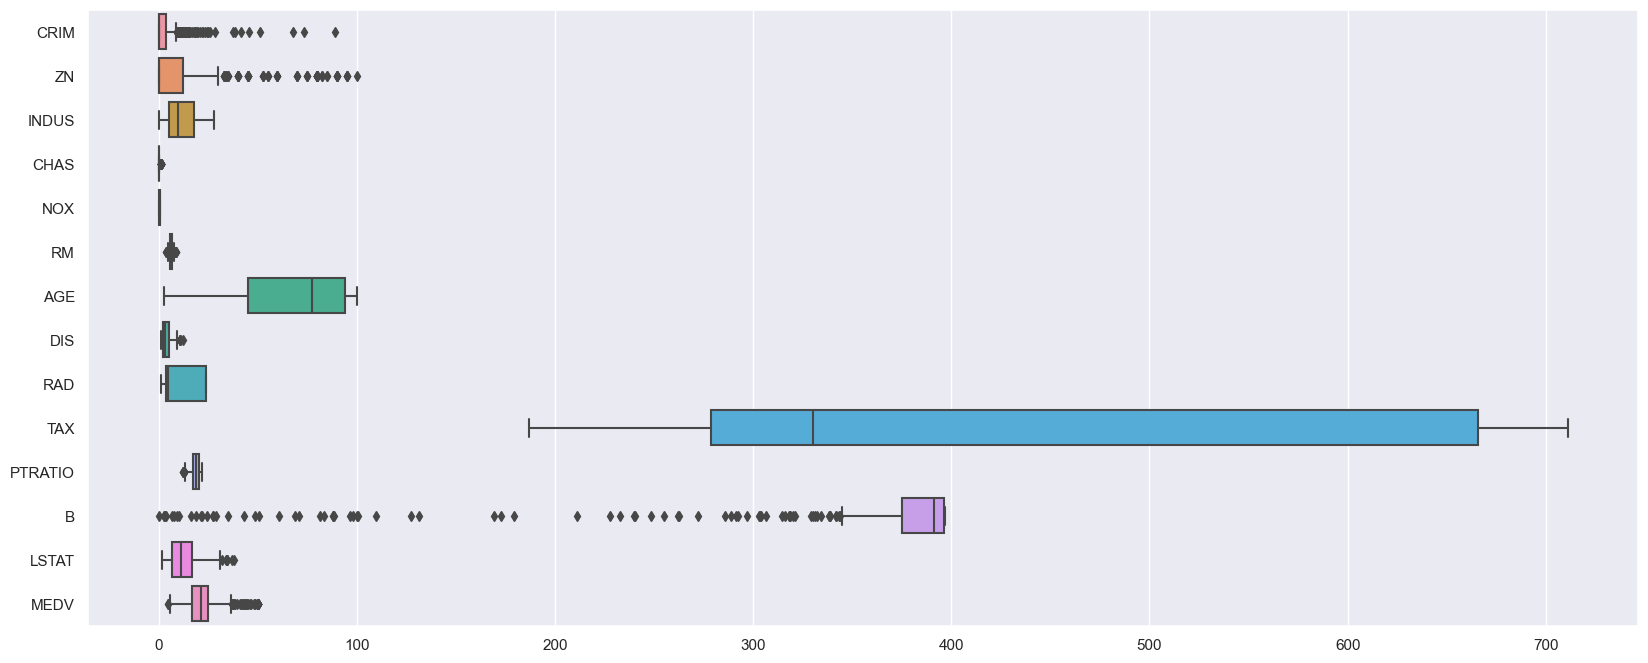

In [5]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(data=df, orient='h')

plt.show()

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.isnull().sum().any()

False

In [10]:
df.isna().sum().any()

False

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [12]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

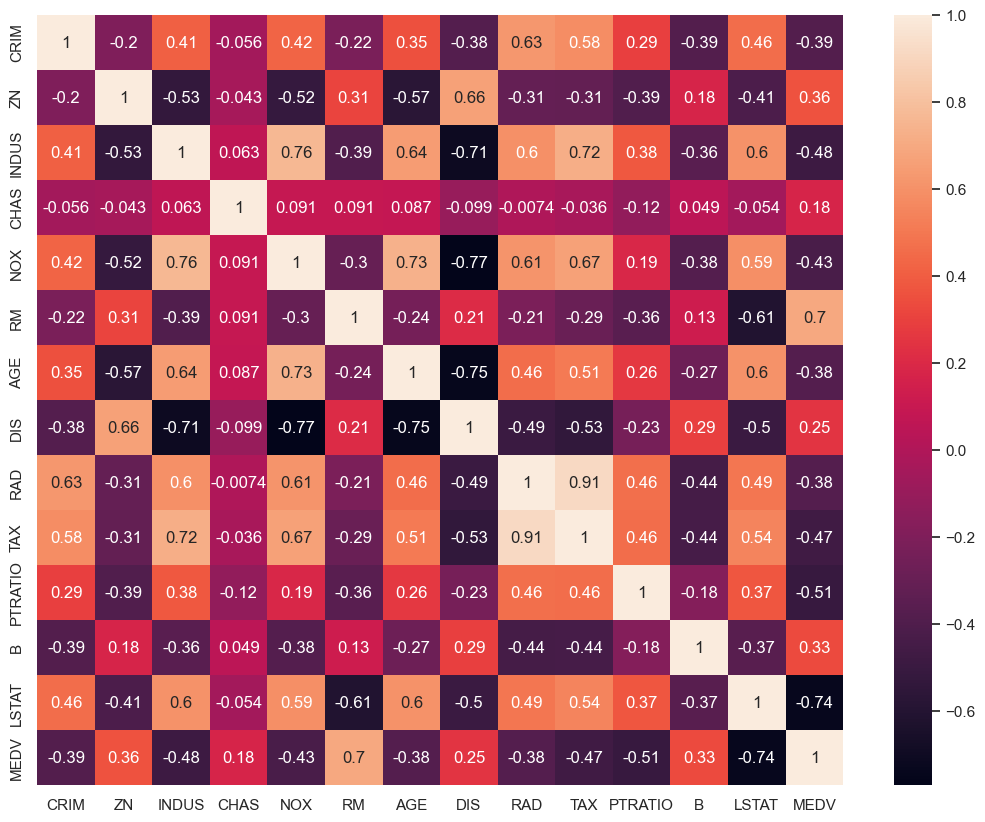

In [13]:
plt.figure(figsize=(13, 10))

sns.heatmap(df.corr(), annot=True)

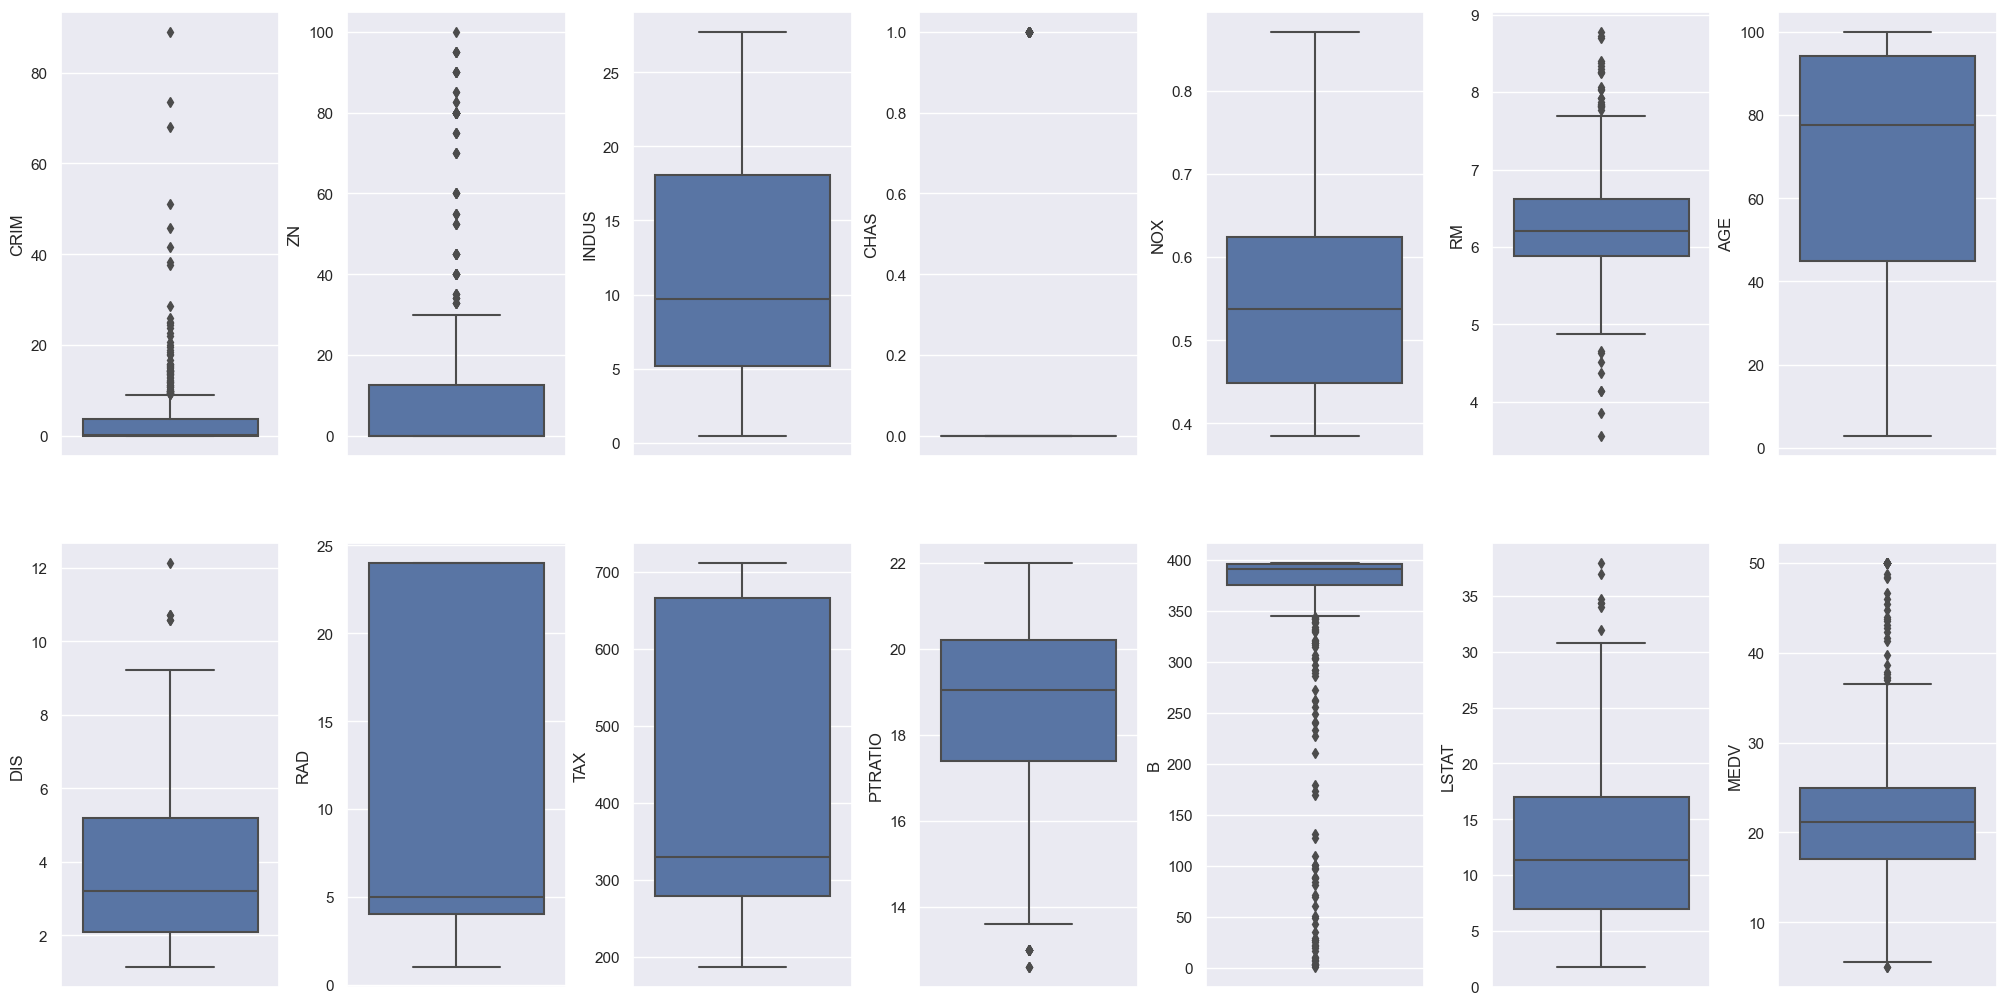

In [14]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10.TAX       full-value property-tax rate per $10,000
11.PTRATIO   pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000's

### Exercise 1
Create at least two different regression models to try to best predict the house price ( MEDV ) in the attached file.

In [15]:
print('Null hypothesis H0, the sample has a normal distribution, It is Guessian')
print('Alternative hypothesis H1, the sample does not  have a normal distribution, It is not Guessian')

for i in df.columns:
    shapiro_test = stats.shapiro(df[i])
    print('For the variable ', i, 'with a p-value of ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('We cannot reject the null hypothesis, It is Guessian')
    else:
        print('We can reject the null hypothesis, It is not Guessian')

Null hypothesis H0, the sample has a normal distribution, It is Guessian
Alternative hypothesis H1, the sample does not  have a normal distribution, It is not Guessian
For the variable  CRIM with a p-value of  1.3285678005931464e-36
We can reject the null hypothesis, It is not Guessian
For the variable  ZN with a p-value of  7.882576753156324e-34
We can reject the null hypothesis, It is not Guessian
For the variable  INDUS with a p-value of  1.0642375893751083e-17
We can reject the null hypothesis, It is not Guessian
For the variable  CHAS with a p-value of  2.350467979135232e-40
We can reject the null hypothesis, It is not Guessian
For the variable  NOX with a p-value of  5.775851259944009e-14
We can reject the null hypothesis, It is not Guessian
For the variable  RM with a p-value of  2.4107271734408187e-10
We can reject the null hypothesis, It is not Guessian
For the variable  AGE with a p-value of  2.2311304847966706e-18
We can reject the null hypothesis, It is not Guessian
For the

In [16]:
def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3 - q1
   outliers = df[((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR)))]
   return outliers

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

outliers = find_outliers_IQR(df[columns])

print("number of outliers: " + str(len(outliers)))
print("max outlier value: " + str(outliers.max()))
print("min outlier value: " + str(outliers.min()))

number of outliers: 506
max outlier value: CRIM        88.9762
ZN         100.0000
INDUS           NaN
CHAS         1.0000
NOX             NaN
RM           8.7800
AGE             NaN
DIS         12.1265
RAD             NaN
TAX             NaN
PTRATIO     13.0000
B          344.0500
LSTAT       37.9700
MEDV        50.0000
dtype: float64
min outlier value: CRIM        9.18702
ZN         33.00000
INDUS           NaN
CHAS        1.00000
NOX             NaN
RM          3.56100
AGE             NaN
DIS        10.58570
RAD             NaN
TAX             NaN
PTRATIO    12.60000
B           0.32000
LSTAT      31.99000
MEDV        5.00000
dtype: float64


In [17]:
outliers.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
print(len(outliers[outliers < 0]))

506


In [19]:
outlier_columns = outliers.columns[outliers.any()]
print("Columns with outliers:", ', '.join(outlier_columns))

Columns with outliers: CRIM, ZN, CHAS, RM, DIS, PTRATIO, B, LSTAT, MEDV


In [20]:
non_outlier_columns = outliers.columns[~outliers.any()]
print("Columns without outliers:", ', '.join(non_outlier_columns))

Columns without outliers: INDUS, NOX, AGE, RAD, TAX


In [21]:
trans = preprocessing.RobustScaler()
df[['CRIM', 'ZN', 'RM', 'DIS',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']] = trans.fit_transform(df[['CRIM', 'ZN', 'RM', 'DIS',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,2.31,0,0.538,0.496612,65.2,0.285777,1,296.0,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,7.07,0,0.469,0.287940,78.9,0.569789,2,242.0,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,7.07,0,0.469,1.323171,61.1,0.569789,2,242.0,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,2.18,0,0.458,1.069783,45.8,0.924391,3,222.0,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,2.18,0,0.458,1.271680,54.2,0.924391,3,222.0,-0.125000,0.261902,-0.602699,1.880878


In [22]:
# Check RobustScaler
medians = df[['CRIM', 'ZN', 'RM', 'DIS',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']].median()
iqrs = df[['CRIM', 'ZN', 'RM', 'DIS',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']].quantile(0.75) - df[['CRIM', 'ZN', 'RM', 'DIS',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']].quantile(0.25)

median_check = np.isclose(medians, 0.0)
iqr_check = np.isclose(iqrs, 1.0)

if median_check.all() and iqr_check.all():
    print("RobustScaler is applied correctly.")
else:
    print("RobustScaler is not applied correctly.")

RobustScaler is applied correctly.


In [23]:
trans = preprocessing.MinMaxScaler()
df[['INDUS', 'NOX', 'AGE', 'TAX' ]] = trans.fit_transform(df[['INDUS', 'NOX', 'AGE', 'TAX']])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,0.067815,0,0.314815,0.496612,0.641607,0.285777,1,0.208015,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,0.242302,0,0.172840,0.287940,0.782698,0.569789,2,0.104962,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,0.242302,0,0.172840,1.323171,0.599382,0.569789,2,0.104962,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,0.063050,0,0.150206,1.069783,0.441813,0.924391,3,0.066794,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,0.063050,0,0.150206,1.271680,0.528321,0.924391,3,0.066794,-0.125000,0.261902,-0.602699,1.880878


In [24]:
# Check MinMaxScaler
min_value = np.min(df[['INDUS', 'NOX', 'AGE', 'TAX' ]])
max_value = np.max(df[['INDUS', 'NOX', 'AGE', 'TAX' ]])

if min_value >= 0.0 and max_value <= 1.0:
    print("MinMaxScaler is applied correctly.")
else:
    print("MinMaxScaler is not applied correctly.")

MinMaxScaler is applied correctly.


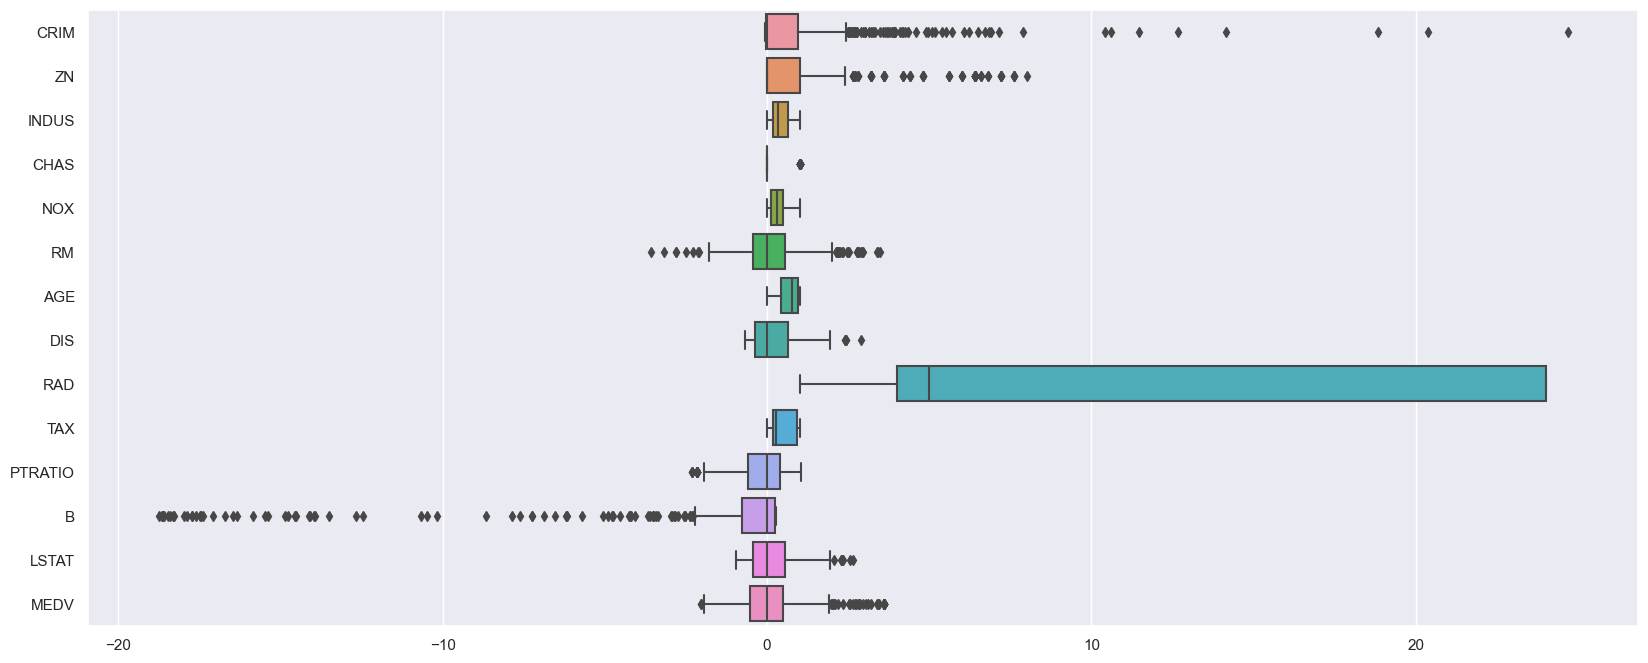

In [25]:
sns.set()
fig, ax = plt.subplots(figsize=(20, 8))
ax = sns.boxplot(data=df, orient='h')

plt.show()

In [26]:
# X_train, X_test, y_train, y_test = train_test_split(df, df['MEDV'], test_size=0.20, random_state=10)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [27]:
print(df.shape)
print(X_train.shape)
print(X_test.shape)

(506, 14)
(404, 13)
(102, 13)


## Model 1

In [28]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()

In [29]:
model_1.fit(X_train, y_train)

LinearRegression()

In [30]:
prediction_1 = model_1.predict(X_test)
prediction_1[0:20] 

array([-0.25573024, -1.28353832,  2.16119192,  0.75025677,  2.48410551,
        0.81796799, -1.33698989,  1.90464463,  1.00891641,  1.73888935,
       -1.00469307, -1.69678109, -0.74616384,  0.41865861, -0.59659476,
        0.96841217,  0.21944559,  0.13631876, -0.04987161, -1.76292071])

In [31]:
mean_prediction_1 = np.mean(prediction_1)
print("Mean Prediction for Model 1:", mean_prediction_1)

Mean Prediction for Model 1: 0.17536957195173425


In [32]:
model_1.score(X_train, y_train)
print(f'coefficient of determination: {model_1.score(X_train, y_train)}')

coefficient of determination: 0.7455417541629948


In [33]:
print(f"intercept: {model_1.intercept_}")
intercept: 5.633333333333329

print(f"slope: {model_1.coef_}")
slope: [0.54]

intercept: 0.569066636140847
slope: [-0.05015243  0.08129787  0.04902589  0.31492671 -0.90962856  0.36412618
 -0.056564   -0.58800388  0.03600133 -0.7368502  -0.32795012  0.02176743
 -0.70248012]


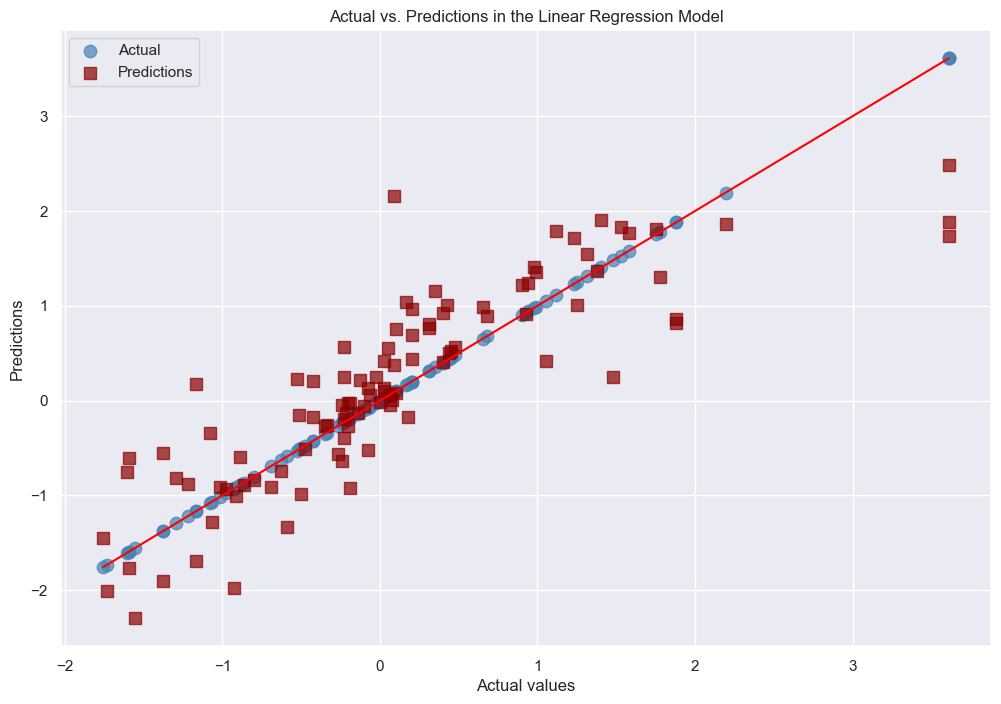

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
# Create a scatter plot
plt.scatter(y_test, y_test, color='steelblue', marker='o', label='Actual', alpha=0.7, s=80)

# Create a scatter plot for predictions
plt.scatter(y_test, prediction_1, color='darkred', marker='s', label='Predictions', alpha=0.7, s=80)

# Plot the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Set labels and title
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.title('Actual vs. Predictions in the Linear Regression Model')

plt.legend()

# Display the plot
plt.show()


## Model 2

In [35]:
from sklearn.ensemble import RandomForestRegressor

model_2= RandomForestRegressor()
model_2.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
prediction_2 = model_2.predict(X_test)
prediction_2[:20]

array([-0.19648903, -0.84789969,  3.12539185,  0.63047022,  3.28501567,
        0.19210031, -0.43824451,  1.2431348 ,  0.39435737,  2.28288401,
       -0.60388715, -0.85216301, -0.56275862,  0.10971787, -0.73642633,
        1.08288401,  0.06984326, -0.09103448, -0.05216301, -1.73454545])

In [37]:
mean_prediction_2 = np.mean(prediction_2)
print("Mean Prediction for Model 2:", mean_prediction_2)

Mean Prediction for Model 2: 0.17678406785911865


In [38]:
model_2.score(X_train, y_train)
print(f'coefficient of determination: {model_2.score(X_train, y_train)}')

coefficient of determination: 0.9846239468852396


In [39]:
model_2.score(X_train, y_train)

0.9846239468852396

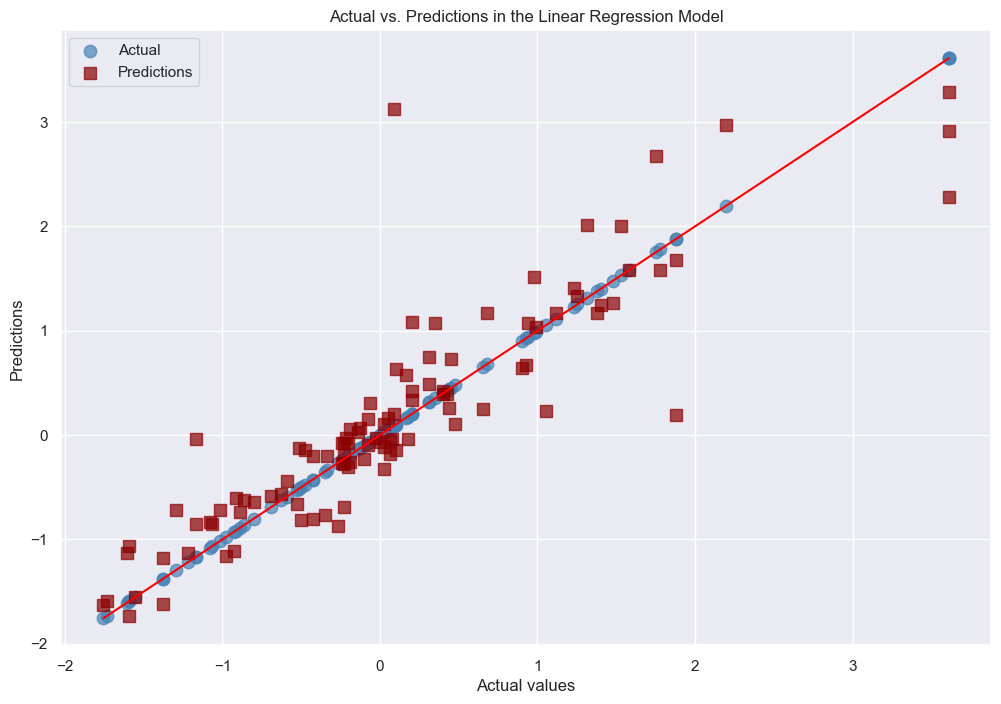

In [40]:
plt.figure(figsize=(12, 8))
# Create a scatter plot
plt.scatter(y_test, y_test, color='steelblue', marker='o', label='Actual', alpha=0.7, s=80)

# Create a scatter plot for predictions
plt.scatter(y_test, prediction_2, color='darkred', marker='s', label='Predictions', alpha=0.7, s=80)

# Plot the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Set labels and title
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.title('Actual vs. Predictions in the Linear Regression Model')

plt.legend()

# Display the plot
plt.show()

## Model 3

In [41]:
from sklearn.svm import SVR
model_3 = SVR()
model_3.fit(X_train, y_train)
prediction_3 = model_3.predict(X_test)
prediction_3[:20]



array([-0.22175832, -0.85661389,  0.15337886,  0.94860384,  1.97397729,
        0.25948035, -0.66108145,  1.14974979,  0.57804109, -0.00669342,
       -0.86366569, -1.27705107, -0.64642253,  0.10426597, -0.96638777,
        0.67046133, -0.21376737,  0.03115635,  0.05907651, -1.93656081])

In [42]:
mean_prediction_3 = np.mean(prediction_3)
print("Mean Prediction for Model 3:", mean_prediction_3)

Mean Prediction for Model 3: 0.05094622553258094


In [43]:
model_3.score(X_train, y_train)

0.7349441332564088

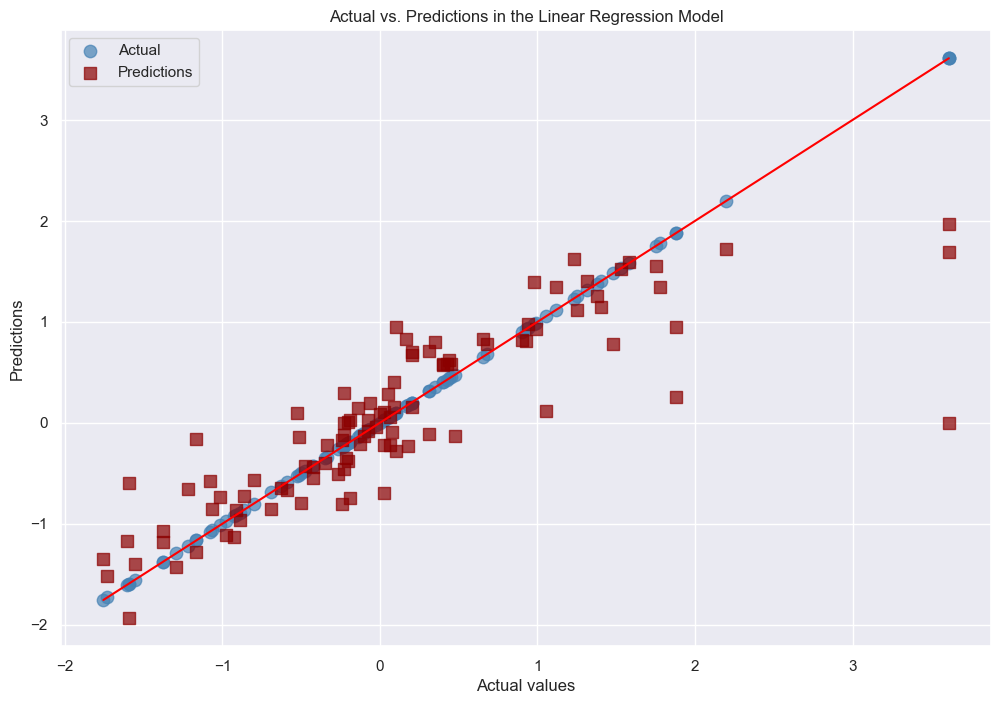

In [44]:
plt.figure(figsize=(12, 8))
# Create a scatter plot
plt.scatter(y_test, y_test, color='steelblue', marker='o', label='Actual', alpha=0.7, s=80)

# Create a scatter plot for predictions
plt.scatter(y_test, prediction_3, color='darkred', marker='s', label='Predictions', alpha=0.7, s=80)

# Plot the perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

# Set labels and title
plt.xlabel('Actual values')
plt.ylabel('Predictions')
plt.title('Actual vs. Predictions in the Linear Regression Model')

plt.legend()

# Display the plot
plt.show()

## Exercise 2
Compare them based on MSE and R2.

In [45]:
from sklearn.metrics import mean_squared_error, r2_score

mse_1 = mean_squared_error(y_test, prediction_1)
mse_2 = mean_squared_error(y_test, prediction_2)
mse_3 = mean_squared_error(y_test, prediction_3)

print("Mean Squared Error_1 (MSE):", mse_1)
print("Mean Squared Error_2 (MSE):", mse_2)
print("Mean Squared Error_3 (MSE):", mse_3)

# Calculate R-squared (R2)
r2_1 = r2_score(y_test, prediction_1)
r2_2 = r2_score(y_test, prediction_2)
r2_3 = r2_score(y_test, prediction_3)
print("R-squared_1 (R2):", r2_1)
print("R-squared_2 (R2):", r2_2)
print("R-squared_3 (R2):", r2_3)

Mean Squared Error_1 (MSE): 0.34022046806110495
Mean Squared Error_2 (MSE): 0.25167366487912557
Mean Squared Error_3 (MSE): 0.3412465781401196
R-squared_1 (R2): 0.7079627967134522
R-squared_2 (R2): 0.7839692783593045
R-squared_3 (R2): 0.7070820080899831


In [46]:
comparison = pd.DataFrame({
    'Model': ['Regresion Lineal', 'Random Forest', 'SVR'],
    'MSE': [mse_1, mse_2, mse_3],
    'R2': [r2_1, r2_2, r2_3]})
comparison

,Model,MSE,R2
0,Regresion Lineal,0.340220,0.707963
1,Random Forest,0.251674,0.783969
2,SVR,0.341247,0.707082


## Exercise 3
Train them using the different parameters they support to try to improve their prediction.

In [47]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Define the models
model_1R = LinearRegression()
model_2R = RandomForestRegressor()
model_3R = SVR()

# Define the parameter distributions for each model
param_distributions_1 = {}

param_distributions_2 = {'n_estimators': [10, 50, 100],'max_depth': [3, 5, 10]}

param_distributions_3 = {'C': [0.5, 1.0, 2.0],'epsilon': [0.01, 0.1, 1.0]}

# Perform randomized search for each model
search_1 = RandomizedSearchCV(model_1R, param_distributions_1, random_state=0)
search_1.fit(X_train, y_train)

search_2 = RandomizedSearchCV(model_2R, param_distributions_2, random_state=0)
search_2.fit(X_train, y_train)

search_3 = RandomizedSearchCV(model_3R, param_distributions_3, random_state=0)
search_3.fit(X_train, y_train)

# Get the best parameters for each model
best_params_1 = search_1.best_params_
best_params_2 = search_2.best_params_
best_params_3 = search_3.best_params_

print("Best parameters for Model 1R:", best_params_1)
print("Best parameters for Model 2R:", best_params_2)
print("Best parameters for Model 3R:", best_params_3)


C:\Users\mhabi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mhabi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\mhabi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Model 1R: {}
Best parameters for Model 2R: {'n_estimators': 100, 'max_depth': 10}
Best parameters for Model 3R: {'epsilon': 0.01, 'C': 2.0}


In [48]:
# Define the models
model_1R = LinearRegression()
model_2R = RandomForestRegressor(n_estimators=50, max_depth=10)
model_3R = SVR(epsilon=0.01, C=10.0)

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Fit the models on the training data
model_1R.fit(X_train, y_train)
model_2R.fit(X_train, y_train)
model_3R.fit(X_train, y_train)

# Make predictions on the test data
prediction_1 = model_1R.predict(X_test)
prediction_2 = model_2R.predict(X_test)
prediction_3 = model_3R.predict(X_test)

In [49]:
print("Predicted values for Model 1:")
print(prediction_1[:20])


Predicted values for Model 1:
[-0.25573024 -1.28353832  2.16119192  0.75025677  2.48410551  0.81796799
 -1.33698989  1.90464463  1.00891641  1.73888935 -1.00469307 -1.69678109
 -0.74616384  0.41865861 -0.59659476  0.96841217  0.21944559  0.13631876
 -0.04987161 -1.76292071]


In [50]:
print("Predicted values for Model 2:")
print(prediction_2[:20])


Predicted values for Model 2:
[-0.20389844 -0.82017362  3.3800627   0.68561832  3.34595611  0.18701582
 -0.40706362  1.23913594  0.48531736  2.05667712 -0.57961722 -1.05003135
 -0.58259868  0.2005199  -0.70187784  0.96197283  0.10678766 -0.0666059
  0.02700176 -1.71868263]


In [51]:
print("Predicted values for Model 3:")
print(prediction_3[:20])


Predicted values for Model 3:
[-0.27555346 -0.92271757  0.82042853  0.90997435  2.5338018   0.38419879
 -0.93722445  1.43505011  0.58692179  0.86056327 -0.8634138  -0.84293384
 -0.74990446  0.13759536 -0.96173215  0.66869472  0.01045099  0.07817475
 -0.04350007 -1.75486372]


In [52]:
# Calculate the mean of the predictions
mean_prediction_1 = np.mean(prediction_1)
mean_prediction_2 = np.mean(prediction_2)
mean_prediction_3 = np.mean(prediction_3)

print("Mean Prediction for Model 1R:", mean_prediction_1)
print("Mean Prediction for Model 2R:", mean_prediction_2)
print("Mean Prediction for Model 3R:", mean_prediction_3)


Mean Prediction for Model 1R: 0.17536957195173425
Mean Prediction for Model 2R: 0.19006804140336003
Mean Prediction for Model 3R: 0.08962388323088726


In [53]:
print(f'coefficient of determination for model_1: {model_1.score(X_train, y_train)}')
print(f'coefficient of determination for model_1R: {model_1R.score(X_train, y_train)}')

coefficient of determination for model_1: 0.7455417541629948
coefficient of determination for model_1R: 0.7455417541629948


In [54]:
print(f'coefficient of determination for model_2: {model_2.score(X_train, y_train)}')
print(f'coefficient of determination for model_2R: {model_2R.score(X_train, y_train)}')

coefficient of determination for model_2: 0.9846239468852396
coefficient of determination for model_2R: 0.9826947573561109


In [55]:
print(f'coefficient of determination for model_3: {model_3.score(X_train, y_train)}')
print(f'coefficient of determination for model_3R: {model_3R.score(X_train, y_train)}')

coefficient of determination for model_3: 0.7349441332564088
coefficient of determination for model_3R: 0.844330588837843


## Exercise 4
Compare your performance using the traint/test approach or using all data (internal validation).

In [56]:
from sklearn.model_selection import cross_val_score

scores_1 = cross_val_score(LinearRegression(), X, y, cv=5)


scores_2 = cross_val_score(RandomForestRegressor(), X, y, cv=5)

scores_3 = cross_val_score(SVR(), X, y, cv=5)

print("Model 1 Cross-Validation Scores:", scores_1)
print("Model 2 Cross-Validation Scores:", scores_2)
print("Model 3 Cross-Validation Scores:", scores_3)


Model 1 Cross-Validation Scores: [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Model 2 Cross-Validation Scores: [0.76440514 0.86420398 0.75172562 0.47481328 0.32438593]
Model 3 Cross-Validation Scores: [ 0.75708269  0.71146535  0.5294802   0.31857815 -0.88233946]


In [57]:
# Calculate the mean and standard deviation of the scores for each model
mean_scores = [np.mean(scores_1), np.mean(scores_2), np.mean(scores_3)]
std_scores = [np.std(scores_1), np.std(scores_2), np.std(scores_3)]

# Create a dictionary to store the model names and their scores
model_scores = {'Linear Regression': mean_scores[0], 'Random Forest Regressor': mean_scores[1],
                'SVR': mean_scores[2]}

# Print the mean scores and standard deviations for each model
for model, mean_score, std_score in zip(model_scores.keys(), mean_scores, std_scores):
    print(f"{model}:")
    print(f"  Mean Score: {mean_score:.4f}")
    print(f"  Standard Deviation: {std_score:.4f}")
    print()


Linear Regression:
  Mean Score: 0.3533
  Standard Deviation: 0.3766

Random Forest Regressor:
  Mean Score: 0.6359
  Standard Deviation: 0.2025

SVR:
  Mean Score: 0.2869
  Standard Deviation: 0.6047



## Exercise 5
Do not use the number of rooms ( RM ) variable when making predictions.

In [58]:
X = df.drop(['MEDV', 'RM'], axis= 1)
y = df['MEDV']
# Model 1: Linear Regression
model_1 = LinearRegression()
scores_1 = cross_val_score(model_1, X, y, cv=5)

# Model 2: Random Forest Regressor
model_2 = RandomForestRegressor()
scores_2 = cross_val_score(model_2, X, y, cv=5)

# Model 3: SVR
model_3 = SVR()
scores_3 = cross_val_score(model_3, X, y, cv=5)

print("Cross-Validation Scores for Model 1:", scores_1)
print("Cross-Validation Scores for Model 2:", scores_2)
print("Cross-Validation Scores for Model 3:", scores_3)


Cross-Validation Scores for Model 1: [0.46450601 0.61522064 0.43616681 0.57879898 0.37296639]
Cross-Validation Scores for Model 2: [0.63242412 0.83004133 0.44176703 0.65668731 0.35917447]
Cross-Validation Scores for Model 3: [ 0.38603966  0.41825784 -0.09005506  0.30283201 -0.76593872]


In [59]:
# Calculate the mean and standard deviation of the scores for each model
mean_scores = [np.mean(scores_1), np.mean(scores_2), np.mean(scores_3)]
std_scores = [np.std(scores_1), np.std(scores_2), np.std(scores_3)]

# Create a dictionary to store the model names and their scores
model_scores = {'Linear Regression': mean_scores[0], 'Random Forest Regressor': mean_scores[1],
                'SVR': mean_scores[2]}

# Print the mean scores and standard deviations for each model
for model, mean_score, std_score in zip(model_scores.keys(), mean_scores, std_scores):
    print(f"{model}:")
    print(f"  Mean Score: {mean_score:.4f}")
    print(f"  Standard Deviation: {std_score:.4f}")
    print()

Linear Regression:
  Mean Score: 0.4935
  Standard Deviation: 0.0903

Random Forest Regressor:
  Mean Score: 0.5840
  Standard Deviation: 0.1667

SVR:
  Mean Score: 0.0502
  Standard Deviation: 0.4467

